<a href="https://colab.research.google.com/github/HuynhTriHenry/BT_AI/blob/main/Final_AI/Train_CacLoaiXe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/Final_AI/anh_xe/'   
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('xe_may'):
    output = 1.0  #'xe máy'
  if file.startswith('xe_hoi'):
    output = 2.0  #'xe hơi'
  if file.startswith('xe_dap'):
    output = 3.0  #'xe đạp'
  if file.startswith('xe_tai'):
    output = 4.0  #'xe tải'
  photo = load_img(folder+file, target_size= (128,128))
#Hiệu chỉnh ảnh
  datagen = ImageDataGenerator(
      rotation_range= 10, 
      horizontal_flip=True,  
      width_shift_range=0.1,  
      height_shift_range=0.1,  
      
  )
  # Thay đổi kích thước ảnh thành (1, height, width, channels)
  photo_np = np.expand_dims(photo, axis=0)
  # Tạo batch dữ liệu biến đổi từ ảnh gốc
  batch = datagen.flow(photo_np, batch_size=1)
  for i in range(4):
      augmented_image = next(batch)[0].astype('uint8')
      photos.append(augmented_image)
      labels.append(output)
    
  photo = img_to_array (photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/Final_AI/xe_photo.npy', photos)
save('/content/drive/MyDrive/Final_AI/xe_label.npy', labels)

In [ ]:
#Tải ảnh và nhãn đã lưu lên để xử lí
photo = np.load('/content/drive/MyDrive/Final_AI/xe_photo.npy')
label = np.load('/content/drive/MyDrive/Final_AI/xe_label.npy')

In [ ]:
#Chia dữ liệu thành 2 phần train và test để kiểm tra mô hình
split_index = int(0.1*len(photo))
test_X,test_Y = photo[:split_index],label[:split_index]
train_X, train_Y = photo[split_index:],label[split_index:]

In [ ]:
train_X.shape

(2507, 128, 128, 3)

In [ ]:
test_X.shape

(278, 128, 128, 3)

In [ ]:
train_X = train_X.reshape((2507,128,128,3))
train_X = train_X.astype('float32')/255
test_X = test_X.reshape((278,128,128,3))
test_X = test_X.astype('float32')/255

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_Y = to_categorical(train_Y,5)
test_Y = to_categorical(test_Y,5)

In [ ]:
# Khai báo các thư viện cần thiết để xây dựng mô hình CNN
from keras.models import Sequential , Model
from keras.layers import Dense , Flatten, Dropout, Conv2D, MaxPooling2D ,Normalization,Input
from keras.optimizers import Adam 

In [ ]:
# Định nghĩa các biến 
batch_size = 50  # số lượng học
epochs =  30   #số lần học
classes = 5    # Số lớp

In [ ]:
model=Sequential()    # Khởi tạo đối tượng để xây dựng mô hình CNN 
model.add(Conv2D(32,kernel_size=(6,6),activation ='linear',input_shape= (128,128,3),padding= 'same'))   
from keras.layers import LeakyReLU
# Sử dụng hàm kích hoạt LeakyReLU cho đầu ra của lớp Conv2D.
model.add(LeakyReLU(alpha= 0))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32,(6,6), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64,(6,6), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64,(6,6), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128,(6,6), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))


from keras.backend import categorical_crossentropy
from keras.losses import categorical_crossentropy
model.add(Flatten())  

model.add(Dense(2048,activation='linear'))   
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1042,activation='linear'))  
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128,activation='linear'))   
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 128, 128, 32)      3488      
                                                                 
 leaky_re_lu_120 (LeakyReLU)  (None, 128, 128, 32)     0         
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 64, 64, 32)        36896     
                                                                 
 leaky_re_lu_121 (LeakyReLU)  (None, 64, 64, 32)       0         
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                

In [ ]:
photo = 0

In [ ]:
#from keras.models import load_model
#model = load_model('/content/drive/MyDrive/Final_AI/train.h5')

In [ ]:
from keras.losses import categorical_crossentropy
model.compile(optimizer= Adam(), loss= categorical_crossentropy, metrics= ['accuracy'])
train = model.fit(train_X, train_Y, epochs= epochs, batch_size= batch_size, verbose= 1)

Epoch 1/30
51/51 [==============================] - 3s 42ms/step - loss: 1.4413 - accuracy: 0.2756
Epoch 2/30
51/51 [==============================] - 2s 37ms/step - loss: 1.2819 - accuracy: 0.3618
Epoch 3/30
51/51 [==============================] - 2s 38ms/step - loss: 1.0237 - accuracy: 0.5030
Epoch 4/30
51/51 [==============================] - 2s 40ms/step - loss: 0.8569 - accuracy: 0.5716
Epoch 5/30
51/51 [==============================] - 2s 44ms/step - loss: 0.7545 - accuracy: 0.6498
Epoch 6/30
51/51 [==============================] - 2s 39ms/step - loss: 0.5554 - accuracy: 0.7551
Epoch 7/30
51/51 [==============================] - 2s 37ms/step - loss: 0.4842 - accuracy: 0.8133
Epoch 8/30
51/51 [==============================] - 2s 37ms/step - loss: 0.3429 - accuracy: 0.8656
Epoch 9/30
51/51 [==============================] - 2s 37ms/step - loss: 0.2162 - accuracy: 0.9158
Epoch 10/30
51/51 [==============================] - 2s 37ms/step - loss: 0.1554 - accuracy: 0.9422
Epoch 11/

In [ ]:
model.save('/content/drive/MyDrive/Final_AI/train.h5')

Test loss: 2.3529727458953857
Test accuracy; 0.7446042895317078


Text(0.5, 1.0, 'Test loss & Test Accuracy')

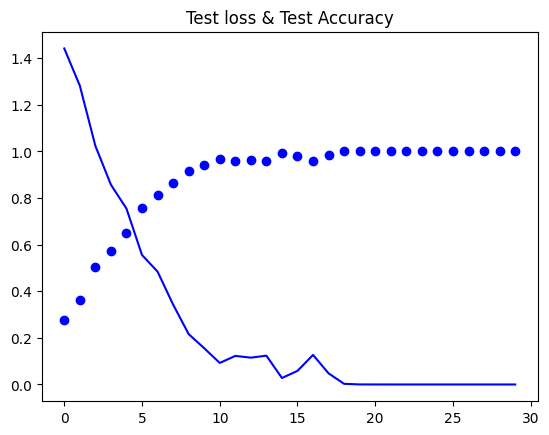

In [ ]:
# Vẽ đồ thị độ chính xác và  của tập test
import matplotlib.pyplot as plt
eval = model.evaluate(test_X,test_Y,verbose=0)
print('Test loss:', eval[0])
print('Test accuracy;',eval[1])
accuracy = train.history['accuracy']
val_accuracy = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Test loss')
plt.plot(epochs,val_accuracy,'b',label= 'Test Accuracy')
plt.title('Test loss & Test Accuracy')

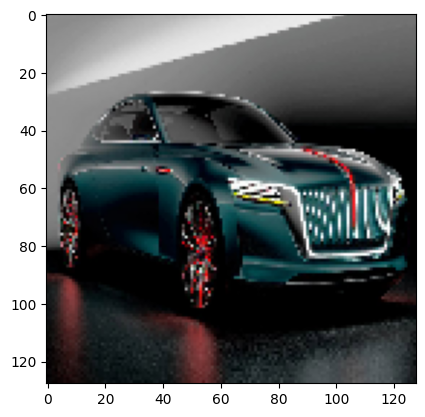

1/1 [==============================] - 0s 165ms/step
Hình ảnh là : Xe Hơi


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.image_utils import load_img, img_to_array
img = load_img('/content/xehoi.jpg',target_size= (128,128))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255

Custom=np.argmax(model.predict(img),axis=-1)

if (Custom == 1) :
  print('Hình ảnh là : Xe Máy')
if (Custom == 2) :
  print('Hình ảnh là : Xe Hơi')
if (Custom == 3) :
  print('Hình ảnh là : Xe Đạp')
if (Custom == 4) :
  print('Hình ảnh là : Xe Tải')

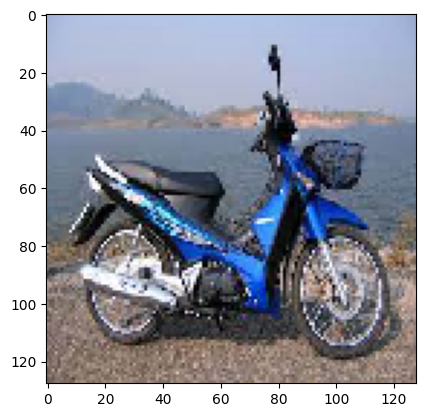

1/1 [==============================] - 0s 19ms/step
Hình ảnh là : Xe Máy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.image_utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Final_AI/anh_test/xemay2.jpg',target_size= (128,128))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255

Custom=np.argmax(model.predict(img),axis=-1)

if (Custom == 1) :
  print('Hình ảnh là : Xe Máy')
if (Custom == 2) :
  print('Hình ảnh là : Xe Hơi')
if (Custom == 3) :
  print('Hình ảnh là : Xe Đạp')
if (Custom == 4) :
  print('Hình ảnh là : Xe Tải')

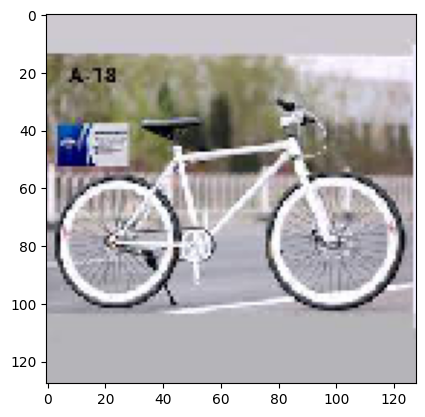

1/1 [==============================] - 0s 19ms/step
Hình ảnh là : Xe Đạp


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.image_utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Final_AI/anh_test/xedap1.jpg',target_size= (128,128))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255

Custom=np.argmax(model.predict(img),axis=-1)

if (Custom == 1) :
  print('Hình ảnh là : Xe Máy')
if (Custom == 2) :
  print('Hình ảnh là : Xe Hơi')
if (Custom == 3) :
  print('Hình ảnh là : Xe Đạp')
if (Custom == 4) :
  print('Hình ảnh là : Xe Tải')

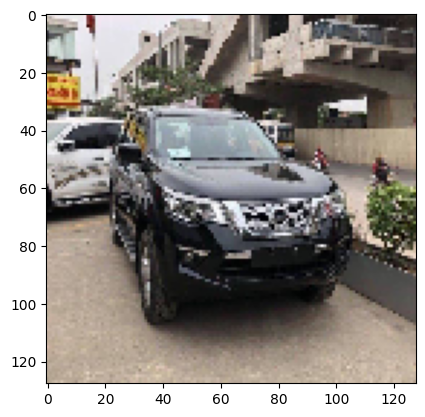

1/1 [==============================] - 0s 50ms/step
Hình ảnh là : Xe Hơi


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.image_utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Final_AI/anh_test/xehoi3.jpg',target_size= (128,128))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255

Custom=np.argmax(model.predict(img),axis=-1)

if (Custom == 1) :
  print('Hình ảnh là : Xe Máy')
if (Custom == 2) :
  print('Hình ảnh là : Xe Hơi')
if (Custom == 3) :
  print('Hình ảnh là : Xe Đạp')
if (Custom == 4) :
  print('Hình ảnh là : Xe Tải')